In [9]:
import pandas
import numpy as np
import pandas as pd

#from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline  



In [10]:

# http://stackoverflow.com/questions/22258491/read-a-small-random-sample-from-a-big-csv-file-into-a-python-data-frame


n = 2458286 # total populatoin (or number of rows in file) 
s = 20000 #desired sample size
filename = "/home/ssamot/hUSCensus1990raw.data.zip"
skip = sorted(np.random.choice(range(1,n), n-s-1, replace=False))
print len(skip)
df = pandas.read_csv(filename,compression = "zip", header=0, sep='\t', skiprows=skip)
print df.shape

2438285
(20000, 125)


In [11]:
state_codes = {
0:"N/a Not a Worker Not in the Labor Force",
1:"Alabama",
2:"Alaska",
4:"Arizona",
5:"Arkansas",
6:"California",
8:"Colorado",
9:"Connecticut",
10:"Delaware",
11:"District of Columbia",
12:"Florida",
13:"Georgia",
15:"Hawaii",
16:"Idaho",
17:"Illinois",
18:"Indiana",
19:"Iowa",
20:"Kansas",
21:"Kentucky",
22:"Louisiana",
23:"Maine",
24:"Maryland",
25:"Massachusetts",
26:"Michigan",
27:"Minnesota",
28:"Mississippi",
29:"Missouri",
30:"Montana",
31:"Nebraska",
32:"Nevada",
33:"New Hampshire",
34:"New Jersey",
35:"New Mexico",
36:"New York",
37:"North Carolina",
38:"North Dakota",
39:"Ohio",
40:"Oklahoma",
41:"Oregon",
42:"Pennsylvania",
44:"Rhode Island",
45:"South Carolina",
46:"South Dakota",
47:"Tennessee",
48:"Texas",
49:"Utah",
50:"Vermont",
51:"Virginia",
53:"Washington",
54:"West Virginia",
55:"Wisconsin",
56:"Wyoming",
98:"Abroad",
99:"State Not Identified"
}

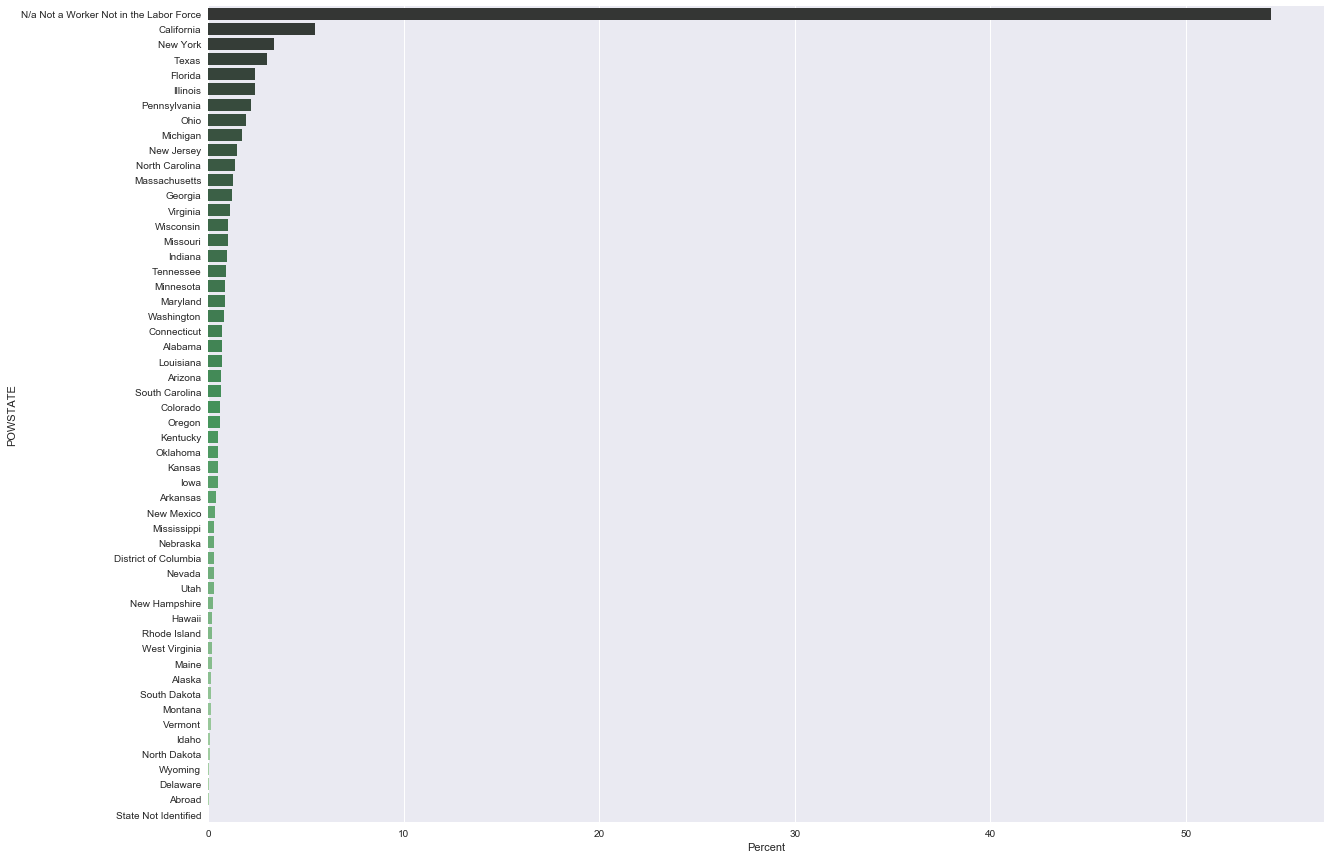

In [12]:
import seaborn as sns


x = df[["POWSTATE"]]

x = x.replace(state_codes)
counts = x["POWSTATE"].value_counts()
sort = counts.index.tolist()

#print df.index
plt.figure(figsize=(20, 15))
#ax = sns.countplot(y="POWSTATE", data=x, palette="Greens_d", order = sort)
ax = sns.barplot(x="POWSTATE", y="POWSTATE", data=x, estimator =lambda x: (float(len(x)) / float(len(df))* 100.0) , palette="Greens_d", order = sort, orient="h")
ax.set(xlabel="Percent")
plt.savefig('states-20000.pdf', bbox_inches='tight')

#ax.set(xlabel="Percent working in")

